In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from IPython.display import HTML

html_code = ''' 
<iframe style = "border-radius:12px" src = "https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm" width="100%" height = "500" frameBorder = "0" allowfullscreen = "" allow = "autoplay; clipboard-write; encrypted-media; fullscreen; picture-in-picture" loading = "lazy"></iframe>
'''

display(HTML(html_code))

## Data Iris

In [38]:
data_iris = pd.read_csv("data01/iris.csv")

In [39]:
data_iris = data_iris.drop_duplicates()
print(data_iris.shape)
data_iris.head(5)

(147, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Preparando dados para treinamento

In [40]:
classes = np.array(pd.unique(data_iris[data_iris.columns[-1]]), dtype='str')

In [41]:
data_iris = data_iris.to_numpy()
y = data_iris[:,-1]
x = data_iris[:,0:data_iris.shape[1]-1]

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler().fit(x)
x = scaler.transform(x)

### Split Train/ Test (HoldOut)

Testando: <br> Nessa célula, vamos dar um split no train/ test e definir um random_state para que o split possa ser feito de maneira igual a cada run no código. <br> Vamos extratificar para que cada train split mantenha uma proporção correta de cada valor na variável y <br> Definimos K, inicialmente, sem saber o melhor valor para tal hiperparâmetro. <br> Então, podemos fittar e treinar o modelo para saber a acurácia <br> 

para todos atributos de flor: sepal_length, sepal_width, petal_length, petal_width

In [43]:
p = 0.7
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, train_size = p, random_state = 42, stratify=y)

k = 6
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train_1,y_train_1)

y_pred_test = model.predict(x_test_1)
score_test = accuracy_score(y_pred_test, y_test_1)

y_pred_train = model.predict(x_train_1)
score_train = accuracy_score(y_pred_train, y_train_1)

print("Resultados no set de teste", y_pred_test)
print("Holdout - Accuracy chute cego de k set teste = ", k,":", score_test) 

print("Resultados no set de treino", y_pred_train)
print("Holdout - Accuracy chute cego de k set treino = ", k,":", score_train) 

Resultados no set de teste ['versicolor' 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'setosa' 'virginica' 'setosa' 'virginica' 'setosa' 'setosa'
 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'versicolor' 'virginica' 'setosa' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'virginica' 'virginica'
 'virginica' 'virginica']
Holdout - Accuracy chute cego de k set teste =  6 : 0.9111111111111111
Resultados no set de treino ['setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor' 'versicolor' 'virginica' 'versicolor' 'versicolor'
 'virginica' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa'
 'versicolor' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'setosa'
 

Abaixo um data frame com os valores de cada feature e a categoria predita

In [9]:
model_predicting = KNeighborsClassifier(n_neighbors=2, metric='euclidean')
model_predicting.fit(x, y)
data_pred = model_predicting.predict(x)


df = pd.DataFrame(x, columns=[f'Feature_{i+1}' for i in range(x.shape[1])])  # Assuming x is a NumPy array or DataFrame
df['Predicted_Category'] = data_pred
print(df)

     Feature_1  Feature_2  Feature_3  Feature_4 Predicted_Category
0    -0.915509   1.019971  -1.357737  -1.335700             setosa
1    -1.157560  -0.128082  -1.357737  -1.335700             setosa
2    -1.399610   0.331139  -1.414778  -1.335700             setosa
3    -1.520635   0.101529  -1.300696  -1.335700             setosa
4    -1.036535   1.249582  -1.357737  -1.335700             setosa
..         ...        ...        ...        ...                ...
142   1.020892  -0.128082   0.809831   1.444682          virginica
143   0.536792  -1.276136   0.695748   0.915085          virginica
144   0.778842  -0.128082   0.809831   1.047484          virginica
145   0.415766   0.790361   0.923913   1.444682          virginica
146   0.052691  -0.128082   0.752789   0.782686          virginica

[147 rows x 5 columns]


### para alguns atributos somente: petal_length, petal_width

Veja que só é possível visualizar espaços 2D (x precisa ter 2 features apenas)

In [10]:
p = 0.75
x_train_few, x_test_few, y_train_few, y_test_few = train_test_split(x[:,2:4], y, train_size = p, random_state = 42, stratify=y)

k = 10
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train_few,y_train_few)

y_pred_few = model.predict(x_test_few)
score = accuracy_score(y_pred_few, y_test_few)

print(y_pred_few)
print("Holdout - Accuracy chute cego de k = ", k,":", score) 


['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'virginica' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'setosa' 'setosa'
 'versicolor' 'setosa' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'virginica' 'setosa' 'virginica' 'setosa' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'setosa' 'setosa' 'setosa' 'virginica'
 'versicolor']
Holdout - Accuracy chute cego de k =  10 : 0.918918918918919


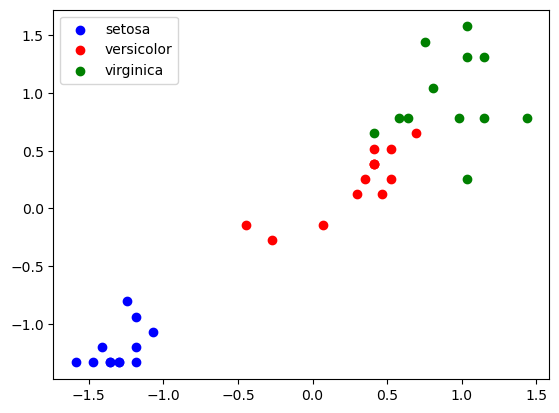

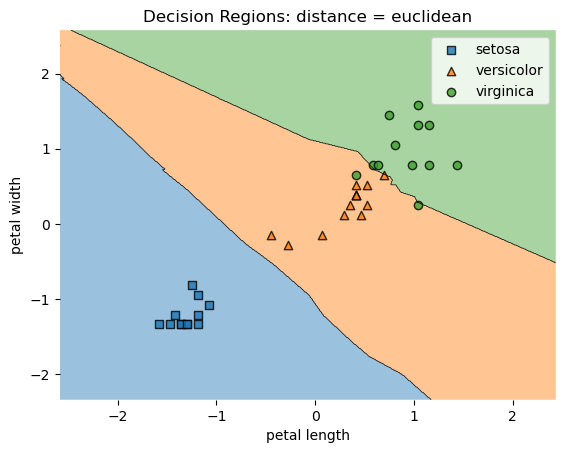

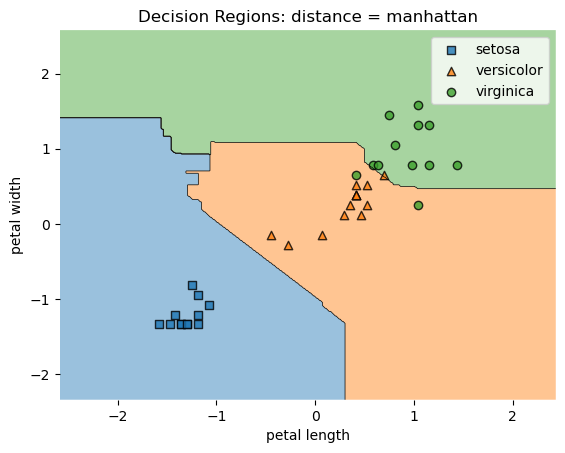

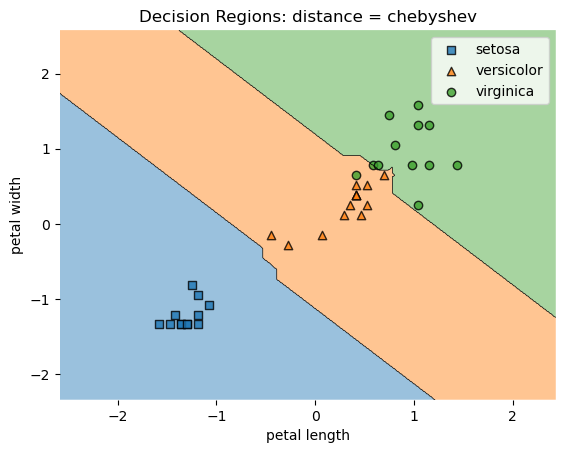

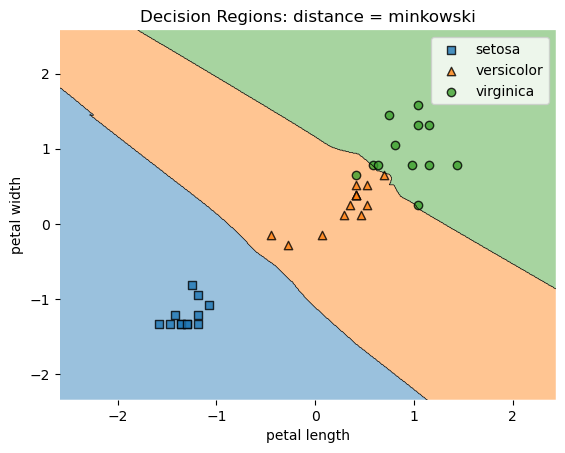

In [11]:
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_test_few)

# Selecionando dois features (atributos) da base de dados petal_length e petal_width
x_selected = x_test_few

colors = ['blue','red','green']
aux = 0
for c in classes:
    ind = np.where(y_test_few == c)
    plt.scatter(x_selected[ind, 0], x_selected[ind, 1], color=colors[aux], label=c)
    aux += 1
plt.legend()
plt.show()

vm = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
k = 9

for d in vm:
    model_vm = KNeighborsClassifier(n_neighbors=k, metric=d, p=3)  
    model_vm.fit(x_selected, y_encoded)
    plot_decision_regions(x_selected, y_encoded, clf=model_vm, legend=2)
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles, classes, frameon=True, fontsize=10)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.title('Decision Regions: distance = ' + d)
    plt.show()

### Cross Validation

Após essa primeira abordagem, usaremos o cross_validation para melhor separar os nossos dados e escolher o best_K, a partir dos arrays originais x e y, já que cross-validation e split train/test (holdout) são diferentes <br> Veja que nessa etapa number of folds dá 5 splits nos dados, onde 4 (k-1 splits) são de treinamento e 1 de teste. <br> Percorremos por vários valores possíveis de K e achamos o que produz maior acurácia média e plottamos. <br> Nota-se que, devido ao random_state = 42, o K = 2 que, inicialmente (e cegamente) escolhemos, não é o melhor, sendo K = best_k mais adequado dentre todas opções percorridas. <br> O treinamento final deverá ser feito no dataset inteiro com os melhores hiperparâmetros escolhidos pelo Cross Validation.

k: 1 accuracy: 0.9455172413793104
k: 2 accuracy: 0.9386206896551723
k: 3 accuracy: 0.9521839080459771
k: 4 accuracy: 0.9521839080459771
k: 5 accuracy: 0.9590804597701149
k: 6 accuracy: 0.9728735632183909
k: 7 accuracy: 0.9590804597701149
k: 8 accuracy: 0.9659770114942529
k: 9 accuracy: 0.9659770114942529
k: 10 accuracy: 0.9521839080459771
k: 11 accuracy: 0.9455172413793104
k: 12 accuracy: 0.9524137931034481
k: 13 accuracy: 0.9457471264367815
k: 14 accuracy: 0.9388505747126438
k: 15 accuracy: 0.9388505747126438
k: 16 accuracy: 0.9388505747126438
k: 17 accuracy: 0.9319540229885057
k: 18 accuracy: 0.9319540229885057
k: 19 accuracy: 0.9457471264367816


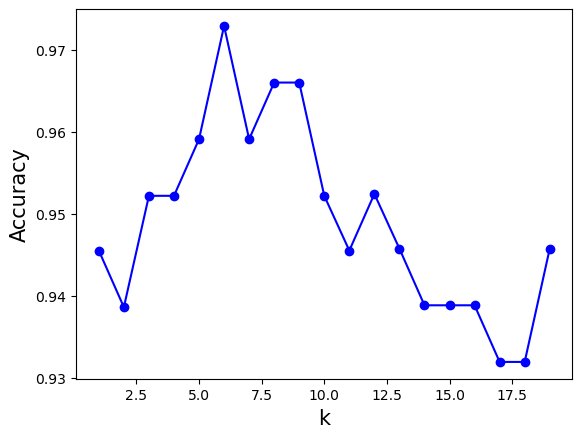

best_k: 6
Accuracy best_k com cross_validation de 5 folds: 0.9728735632183909


In [12]:
nkf = 5 
vk = [] 
vscore = []

for k in range(1, 20):
    model_cv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model_cv, x, y, cv=nkf)
    print('k:', k, 'accuracy:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('best_k:', best_k)

model_2 = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model_2.fit(x, y)
cv_2 = cross_validate(model_2, x, y, cv=5)

print("Accuracy best_k com cross_validation de", nkf, "folds:", cv_2['test_score'].mean())

Predicting

In [13]:
model_predicting = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model_predicting.fit(x, y)

new_data = np.array([[5.1, 3.5, 1.4, 0.2], [1, 1.1, 4.2, 1.3], [3.0, 2.0, 5.1, 5.1]])
new_data_scaled = scaler.transform(new_data)

predicted_category = model_predicting.predict(new_data_scaled)
print("Predicted category:", predicted_category)

Predicted category: ['setosa' 'versicolor' 'virginica']


Hypertuning model parameters using GridSearchCV

In [14]:
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, cv=5)
grid_search.fit(x, y)

best_k = grid_search.best_params_['n_neighbors']

print("Best k:", best_k)
print("Best cross-validation score:", grid_search.best_score_)


Best k: 6
Best cross-validation score: 0.9728735632183909


Visualizando regiões de decisão

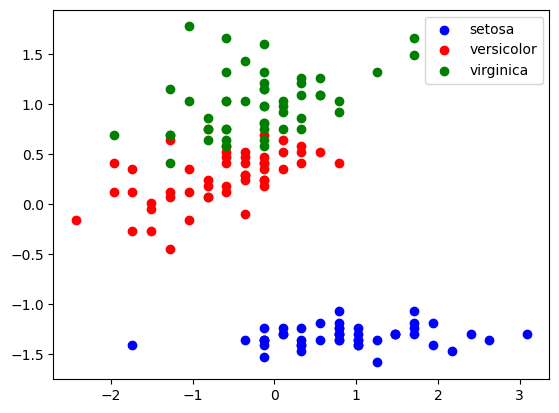

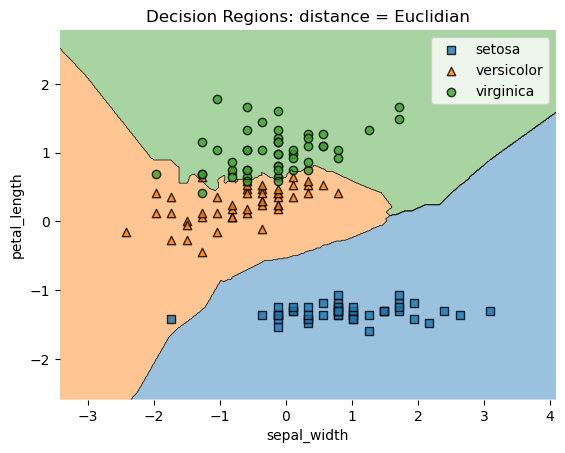

In [15]:
from mlxtend.plotting import plot_decision_regions
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Selecionando dois features (atributos) da base de dados 
x_selected = x[:, 1:3]

colors = ['blue','red','green']
aux = 0
for c in classes:
    ind = np.where(y == c)
    plt.scatter(x_selected[ind, 0], x_selected[ind, 1], color=colors[aux], label=c)
    aux += 1
plt.legend()
plt.show()


model_2 = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model_2.fit(x_selected, y_encoded)
#cv_2 = cross_validate(model_2, x_selected, y_encoded, cv=5)

plot_decision_regions(x_selected, y_encoded, clf=model_2, legend=2)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, classes, frameon=True, fontsize=10)
plt.xlabel('sepal_width')
plt.ylabel('petal_length')
plt.title('Decision Regions: distance = Euclidian')
plt.show()

## Data Vehicle

In [16]:
data_vehicle = pd.read_csv("data01/Vehicle.csv")

In [17]:
data_vehicle.head(5)

,Comp,Circ,D.Circ,Rad.Ra,Pr.Axis.Ra,Max.L.Ra,Scat.Ra,Elong,Pr.Axis.Rect,Max.L.Rect,Sc.Var.Maxis,Sc.Var.maxis,Ra.Gyr,Skew.Maxis,Skew.maxis,Kurt.maxis,Kurt.Maxis,Holl.Ra,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


In [18]:
data_vehicle['Class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

### Preparing

In [19]:
classes = np.array(pd.unique(data_vehicle[data_vehicle.columns[-1]]), dtype='str')
data_vehicle_np = data_vehicle.to_numpy()
y = data_vehicle_np[:,-1]
x = data_vehicle_np[:,0:data_vehicle_np.shape[1]-1]

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler().fit(x)
x = scaler.transform(x)

### Training

In [21]:
p = 0.7
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x, y, train_size = p, random_state = 42, stratify=y)

k = 7
model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
model.fit(x_train_1,y_train_1)

y_pred_1 = model.predict(x_test_1)
score = accuracy_score(y_pred_1, y_test_1)

#print(y_pred_1)
print("Holdout - Accuracy chute cego de k = ", k,":", score) 

Holdout - Accuracy chute cego de k =  7 : 0.7362204724409449


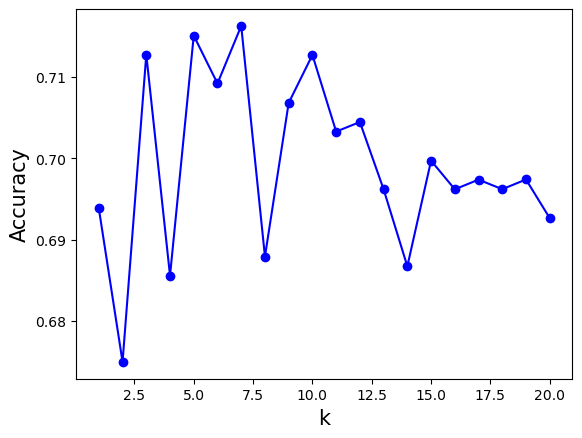

best_k: 7
Accuracy best_k com cross_validation de 5 folds: 0.7163035154890359


In [22]:
nkf = 5 
vk = [] 
vscore = []

for k in range(1, 21):
    model_cv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model_cv, x, y, cv=nkf)
    #print('k:', k, 'accuracy:', cv['test_score'].mean())
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('best_k:', best_k)

model_2 = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model_2.fit(x, y)
cv_2 = cross_validate(model_2, x, y, cv=nkf)

print("Accuracy best_k com cross_validation de", nkf, "folds:", cv_2['test_score'].mean())

## Exemplo com dados 'circulares' e transformações de coordenadas:

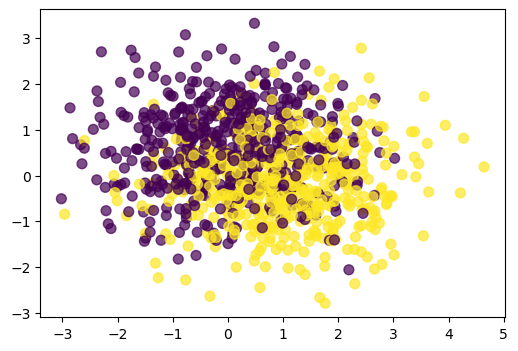

In [23]:
from sklearn import datasets 

plt.figure(figsize=(6,4)) 
n_samples = 1000 
data  = datasets.make_moons(n_samples=n_samples, noise=.9, random_state=42) 
X = data[0] 
y = data[1] 
plt.scatter(X[:,0], X[:,1], c=y, cmap='viridis', s=50, alpha=0.7) 
plt.show(True)

Aqui transformo os dados num data frame para entender melhor a situação, apenas para fins de compreensão do exercício

In [24]:
d = np.column_stack((X,np.transpose(y)))
data = pd.DataFrame(data = d, columns=['X1', 'X2', 'y'])
features_names = ['X1', 'X2']
class_labels = np.unique(y)

print("Nossas classes são:\n", data['y'].value_counts())
data.head(5)

Padronizando os dados

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


scaler = StandardScaler().fit(X)
X = scaler.transform(X)


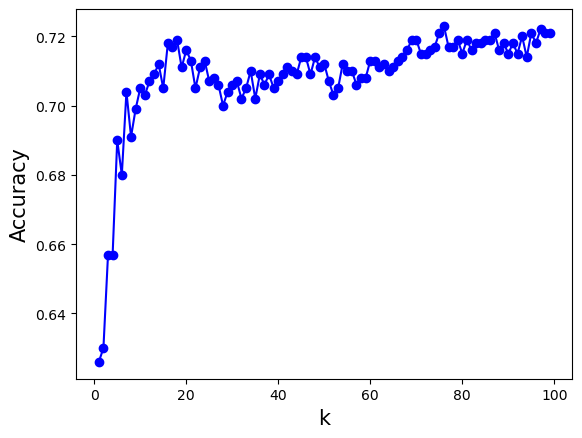

best_k: 76
Accuracy best_k com cross_validation de 5 folds: 0.723


In [26]:
nkf = 5 
vk = [] 
vscore = []

for k in range(1, 100):
    model_cv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model_cv, X, y, cv=nkf)
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('best_k:', best_k)

model_2 = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model_2.fit(X, y)
cv_2 = cross_validate(model_2, X, y, cv=5)

print("Accuracy best_k com cross_validation de", nkf, "folds:", cv_2['test_score'].mean())

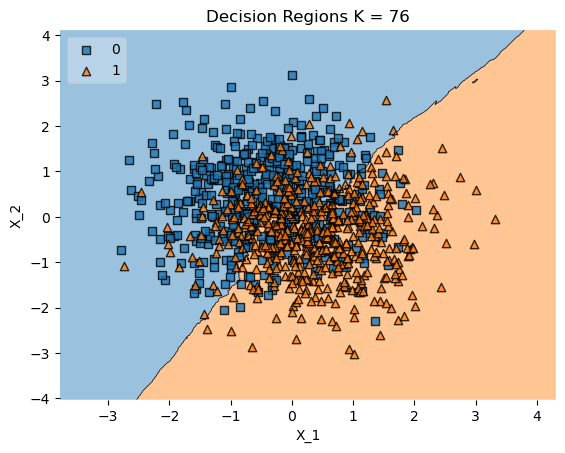

In [27]:
from mlxtend.plotting import plot_decision_regions

model_2 = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model_2.fit(X, y)

plot_decision_regions(X, y, clf=model_2, legend=2)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Decision Regions K = 76')
plt.show()

Transformando em polares e padronizando também

In [28]:
X_polar = np.zeros_like(X)
X_polar[:, 0] = np.sqrt(X[:, 0]**2 + X[:, 1]**2)  # Radius
X_polar[:, 1] = np.arctan2(X[:, 1], X[:, 0])  # Angle

scaler = StandardScaler().fit(X_polar)
X_polar_scaled = scaler.transform(X_polar)

In [29]:
X_polar

array([[ 1.16154511,  2.34504513],
       [ 1.13978504, -0.02496073],
       [ 1.48169366,  1.67707938],
       ...,
       [ 1.7359205 , -0.7831732 ],
       [ 1.76588169, -2.54340135],
       [ 0.55684238,  1.28757815]])

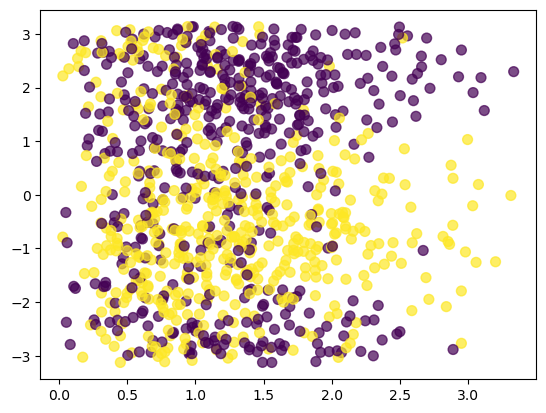

In [30]:
plt.scatter(X_polar[:,0], X_polar[:,1], c=y, cmap='viridis', s=50, alpha=0.7) 
plt.show(True)

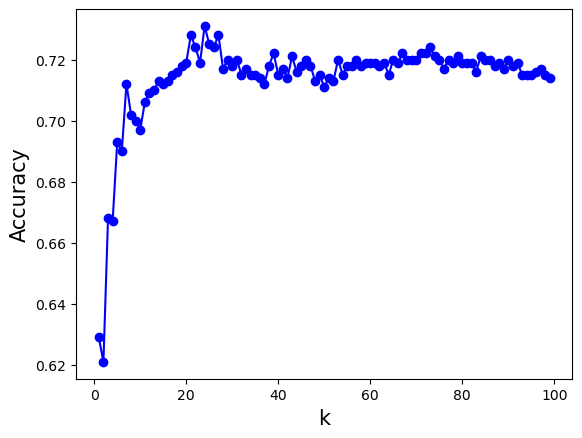

best_k: 24
Accuracy best_k com cross_validation de 5 folds: 0.7310000000000001


In [31]:
nkf = 5 
vk = [] 
vscore = []

for k in range(1, 100):
    model_cv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model_cv, X_polar, y, cv=nkf)
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('best_k:', best_k)

model_2 = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model_2.fit(X_polar, y)
cv_2 = cross_validate(model_2, X_polar, y, cv=5)

print("Accuracy best_k com cross_validation de", nkf, "folds:", cv_2['test_score'].mean())

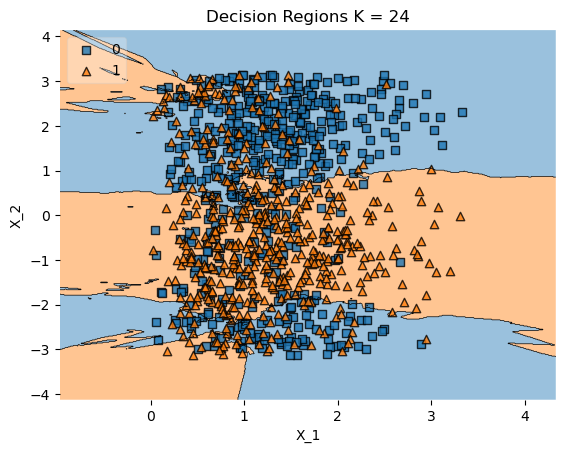

In [32]:
from mlxtend.plotting import plot_decision_regions

model_2 = KNeighborsClassifier(n_neighbors=24, metric='euclidean')
model_2.fit(X_polar, y)

plot_decision_regions(X_polar, y, clf=model_2, legend=2)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Decision Regions K = 24')
plt.show()

In [33]:
X_polar_scaled

array([[-0.14986433,  1.23508399],
       [-0.18357301, -0.0717796 ],
       [ 0.3460803 ,  0.86675573],
       ...,
       [ 0.73990509, -0.48987151],
       [ 0.78631819, -1.46049278],
       [-1.08661405,  0.65197779]])

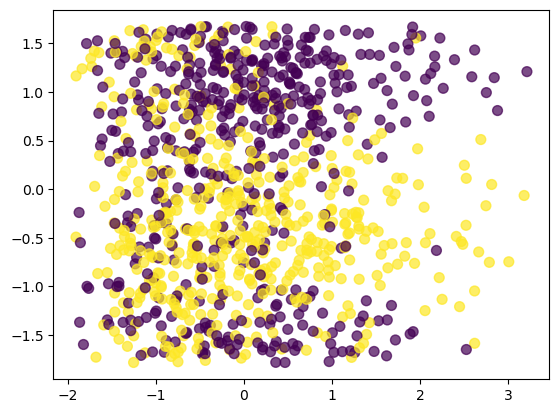

In [34]:
plt.scatter(X_polar_scaled[:,0], X_polar_scaled[:,1], c=y, cmap='viridis', s=50, alpha=0.7) 
plt.show(True)

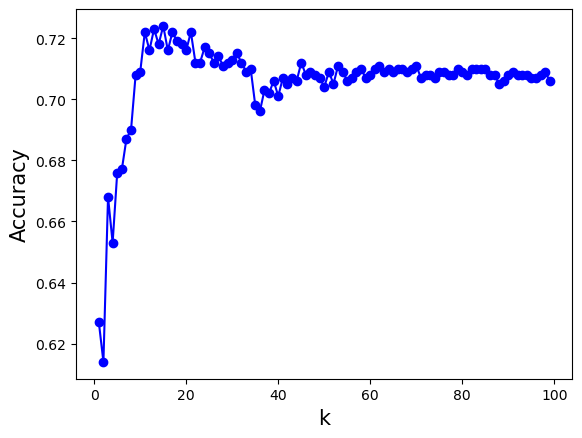

best_k: 15
Accuracy best_k com cross_validation de 5 folds: 0.724


In [35]:
nkf = 5 
vk = [] 
vscore = []

for k in range(1, 100):
    model_cv = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    cv = cross_validate(model_cv, X_polar_scaled, y, cv=nkf)
    vscore.append(cv['test_score'].mean()) 
    vk.append(k)

plt.plot(vk, vscore, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show(True)
best_k = np.argmax(vscore)+1
print('best_k:', best_k)

model_2 = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
model_2.fit(X_polar_scaled, y)
cv_2 = cross_validate(model_2, X_polar_scaled, y, cv=5)

print("Accuracy best_k com cross_validation de", nkf, "folds:", cv_2['test_score'].mean())

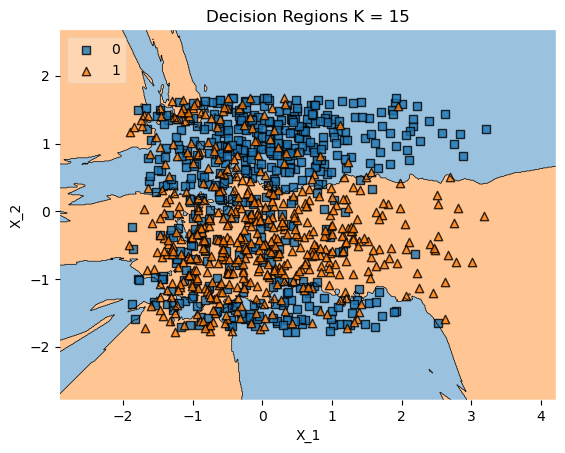

In [36]:
from mlxtend.plotting import plot_decision_regions

model_2 = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
model_2.fit(X_polar_scaled, y)

plot_decision_regions(X_polar_scaled, y, clf=model_2, legend=2)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Decision Regions K = 15')
plt.show()